# London Housing Data Analysis
This analysis aims to explore the London housing dataset, which contains information on housing prices, the number of houses sold, and the number of crimes in different areas over various dates. Using Python libraries such as Pandas, Matplotlib, and Seaborn, we will analyze the dataset to uncover patterns and insights.

### Data Import
Importing the necessary libraries

In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

### Load the dataset

In [7]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python Data Analysis\Housing+Data.csv")

### Display the first few rows of the dataframe

In [19]:
data.head(5)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


### Initial Exploration

### Checking Data Types
Let's check the data types of each column to ensure they are as expected.

In [26]:
data.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

### Summary Statistics
We will also generate summary statistics for the numerical columns to understand the central tendency and dispersion.

In [29]:
data.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


### Checking for Missing Values
Next, we will check for any missing values in the dataset.

In [32]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

### Filling missing values with the median

In [77]:
data['houses_sold'] = data['houses_sold'].fillna(data['houses_sold'].median())

In [79]:
data['no_of_crimes'] = data['no_of_crimes'].fillna(data['no_of_crimes'].median())

### Data Analysis

### Trend of Average Housing Prices Over Time

We will analyze how the average housing prices have changed over time.

### Converting date column to datetime

In [89]:
data['date'] = pd.to_datetime(data['date'])

In [91]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

### Plotting the trend of average housing prices over time

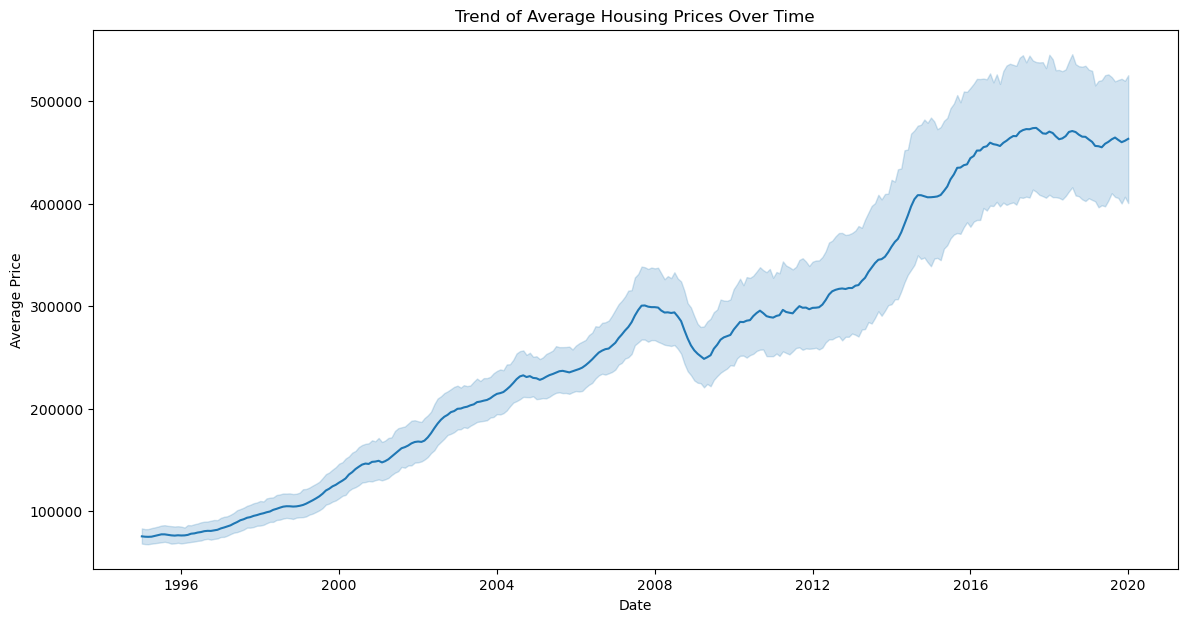

In [83]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='average_price', data=data)
plt.title('Trend of Average Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

### Number of Houses Sold Over Time

We will analyze the trend of houses sold over time.

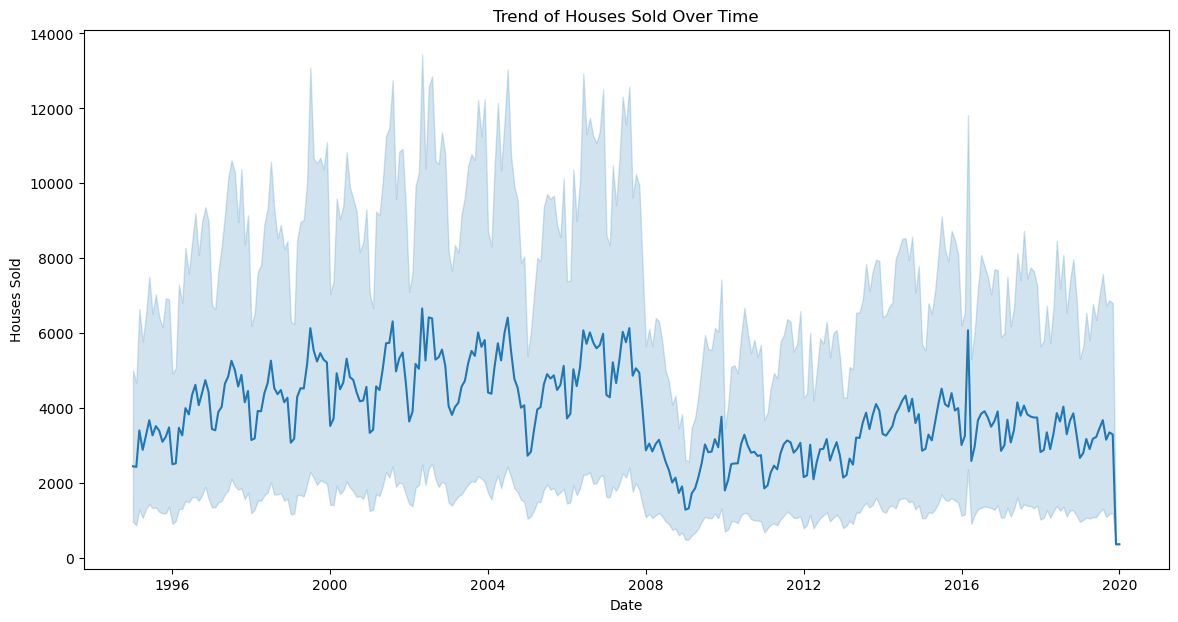

In [95]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='houses_sold', data=data)
plt.title('Trend of Houses Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Houses Sold')
plt.show()

#### Plotting the trend of number of crimes over time

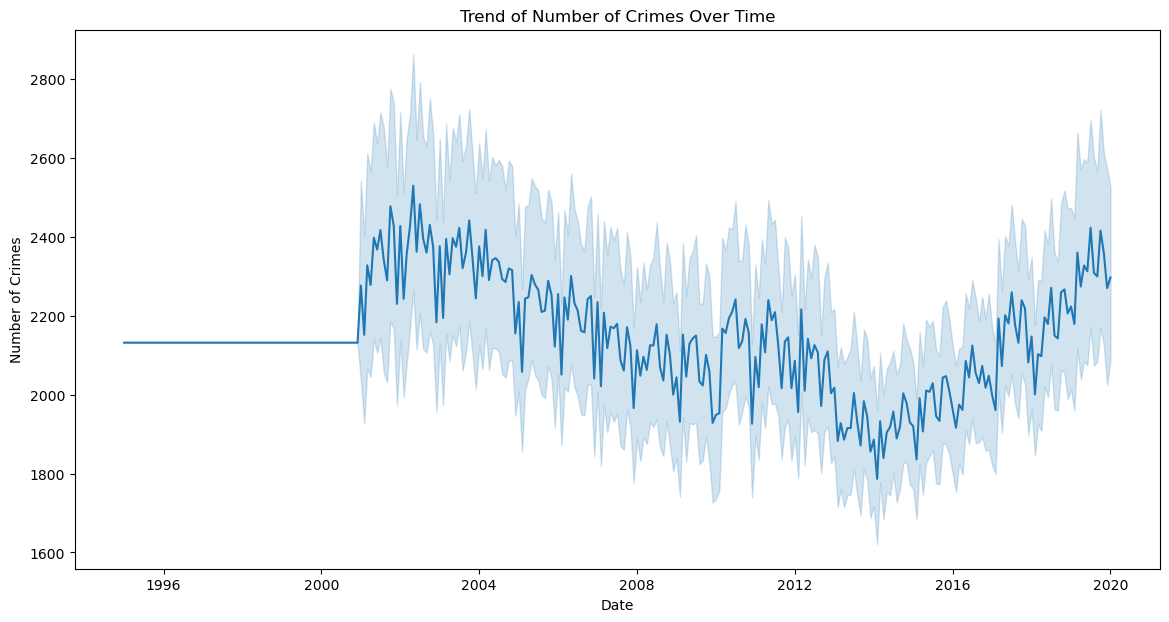

In [85]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='no_of_crimes', data=data)
plt.title('Trend of Number of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

In [62]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])


In [64]:
correlation_matrix = numeric_columns.corr()

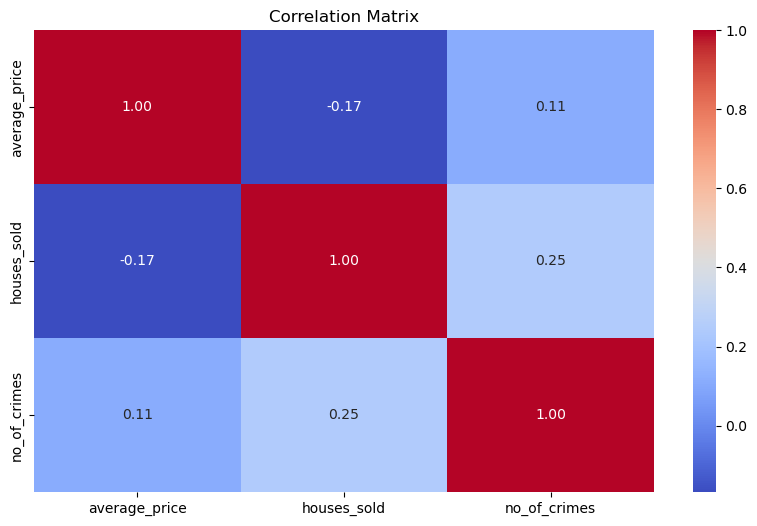

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Create a new column called 'Year'

In [98]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,2132.0
1,1995-02-01,city of london,82203,E09000001,7.0,2132.0


In [100]:
data['year'] = data.date.dt.year

In [102]:
data

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,2132.0,1995
1,1995-02-01,city of london,82203,E09000001,7.0,2132.0,1995
2,1995-03-01,city of london,79121,E09000001,14.0,2132.0,1995
3,1995-04-01,city of london,77101,E09000001,7.0,2132.0,1995
4,1995-05-01,city of london,84409,E09000001,10.0,2132.0,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,2132.0,2019
13545,2019-10-01,england,249376,E92000001,68677.0,2132.0,2019
13546,2019-11-01,england,248515,E92000001,67814.0,2132.0,2019
13547,2019-12-01,england,250410,E92000001,371.0,2132.0,2019


### Create a new column called 'Month'

In [111]:
data['month'] = data.date.dt

In [107]:
data

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,2132.0,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,2132.0,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,2132.0,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,2132.0,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,2132.0,1995,5
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,2132.0,2019,9
13545,2019-10-01,england,249376,E92000001,68677.0,2132.0,2019,10
13546,2019-11-01,england,248515,E92000001,67814.0,2132.0,2019,11
13547,2019-12-01,england,250410,E92000001,371.0,2132.0,2019,12


In [ ]:
Remove the columns 'year' and 'month' from dataframe

In [117]:
data.drop( ['month', 'year'], axis=1, inplace = True)

In [119]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,2132.0
1,1995-02-01,city of london,82203,E09000001,7.0,2132.0
2,1995-03-01,city of london,79121,E09000001,14.0,2132.0
3,1995-04-01,city of london,77101,E09000001,7.0,2132.0
4,1995-05-01,city of london,84409,E09000001,10.0,2132.0
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,2132.0
13545,2019-10-01,england,249376,E92000001,68677.0,2132.0
13546,2019-11-01,england,248515,E92000001,67814.0,2132.0
13547,2019-12-01,england,250410,E92000001,371.0,2132.0


### Show all the records where 'No. of crimes is 0' And how many such records are there?

In [122]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,2132.0
1,1995-02-01,city of london,82203,E09000001,7.0,2132.0
2,1995-03-01,city of london,79121,E09000001,14.0,2132.0
3,1995-04-01,city of london,77101,E09000001,7.0,2132.0
4,1995-05-01,city of london,84409,E09000001,10.0,2132.0


In [124]:
data[(data.no_of_crimes == 0)] 

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [126]:
len(data[(data.no_of_crimes == 0)])

104

### What is the maximum & minimum 'average_price' per year in england?

In [129]:
data['year'] = data.date.dt.year

In [131]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,2132.0,1995
1,1995-02-01,city of london,82203,E09000001,7.0,2132.0,1995
2,1995-03-01,city of london,79121,E09000001,14.0,2132.0,1995
3,1995-04-01,city of london,77101,E09000001,7.0,2132.0,1995
4,1995-05-01,city of london,84409,E09000001,10.0,2132.0,1995


In [133]:
df1 = data[data.area=='england']

In [135]:
df1

,date,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,england,53203,E92000001,47639.0,2132.0,1995
13249,1995-02-01,england,53096,E92000001,47880.0,2132.0,1995
13250,1995-03-01,england,53201,E92000001,67025.0,2132.0,1995
13251,1995-04-01,england,53591,E92000001,56925.0,2132.0,1995
13252,1995-05-01,england,53678,E92000001,64192.0,2132.0,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,2132.0,2019
13545,2019-10-01,england,249376,E92000001,68677.0,2132.0,2019
13546,2019-11-01,england,248515,E92000001,67814.0,2132.0,2019
13547,2019-12-01,england,250410,E92000001,371.0,2132.0,2019


In [145]:
df1.groupby('year').average_price.max()

year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [143]:
df1.groupby('year').average_price.min()

year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

#### Show the Maximum & Minimum No. of Crimes recorded per area?

In [156]:
data.groupby('area').no_of_crimes.max().sort_values(ascending=False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
south west                2132.0
sutton                    2132.0
south east                2132.0
north west                2132.0
west midlands             2132.0
richmond upon thames      2132.0
outer

In [152]:
data.groupby('area').no_of_crimes.min().sort_values(ascending=True)

area
city of london               0.0
kingston upon thames       692.0
richmond upon thames       700.0
sutton                     787.0
merton                     819.0
bexley                     860.0
harrow                     937.0
havering                  1130.0
barking and dagenham      1217.0
hammersmith and fulham    1323.0
kensington and chelsea    1347.0
bromley                   1441.0
hillingdon                1445.0
redbridge                 1487.0
greenwich                 1513.0
hounslow                  1529.0
haringey                  1536.0
waltham forest            1575.0
wandsworth                1582.0
enfield                   1635.0
tower hamlets             1646.0
lewisham                  1675.0
barnet                    1703.0
brent                     1850.0
hackney                   1870.0
islington                 1871.0
ealing                    1871.0
croydon                   2031.0
camden                    2079.0
newham                    2130.0
westm

#### Show the total count of records of each area, where average price is less than 100000

In [160]:
data[data.average_price < 100000].area.value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow         